# 📘 Polynomial Regression (Multivariate Form)

## 📖 1. What Is Polynomial Regression?

**Polynomial regression** is a generalization of linear regression that models the relationship between the predictors and the response as a **polynomial function**.

It captures **nonlinear relationships** and **interactions** between variables by expanding the feature space.


## 🧠 2. General Model Form

Suppose you have $ p $ predictors:

$$
\mathbf{x} = (x_1, x_2, \dots, x_p)
$$

A **polynomial regression model of degree  $d$** expresses the response $ Y $ as a **linear combination of all monomials** in $ x_1, \dots, x_p $ up to total degree $ d $:

$$
Y = \beta_0 + \sum_{|\alpha| \leq d} \beta_\alpha \cdot \mathbf{x}^\alpha + \varepsilon
$$

Where:
- $ \alpha = (\alpha_1, \dots, \alpha_p) \in \mathbb{N}_0^p $, with $ |\alpha| = \sum \alpha_j \leq d $
- $ \mathbf{x}^\alpha = x_1^{\alpha_1} x_2^{\alpha_2} \cdots x_p^{\alpha_p} $



### ✅ Explicit Degree-2 Case

$$
Y = \beta_0 + \sum_{j=1}^{p} \beta_j x_j + \sum_{j=1}^{p} \beta_{jj} x_j^2 + \sum_{1 \leq j < k \leq p} \beta_{jk} x_j x_k + \varepsilon
$$



### 🧮 Example: Degree-3 Model with 2 Variables

$$
Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_{11} x_1^2 + \beta_{22} x_2^2 + \beta_{12} x_1 x_2 + \beta_{111} x_1^3 + \beta_{222} x_2^3 + \beta_{112} x_1^2 x_2 + \beta_{122} x_1 x_2^2 + \varepsilon
$$



### 🧰 Matrix Form

Let \( \phi(x) \in \mathbb{R}^q \) denote the vector of all polynomial terms.  
The model becomes:

$$
Y = \phi(x)^T \boldsymbol{\beta} + \varepsilon
$$



## 📦 3. Feature Explosion

$$
\text{Number of terms} = \binom{p + d}{d}
$$








## 🧪 Simulated Example

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Simulate data
np.random.seed(0)
n = 200
X1 = np.random.uniform(-2, 2, size=n)
X2 = np.random.uniform(-2, 2, size=n)
epsilon = np.random.normal(0, 1, size=n)
Y = 1 + 2*X1 + 3*X2**2 + 0.5*X1*X2 + epsilon

df = pd.DataFrame({'X1': X1, 'X2': X2, 'Y': Y})
X = df[['X1', 'X2']]
y = df['Y']

In [2]:
# Fit degree-2 polynomial regression
model = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    LinearRegression()
)
model.fit(X, y)
y_pred = model.predict(X)

print('MSE:', mean_squared_error(y, y_pred))
print('R^2:', r2_score(y, y_pred))

MSE: 0.9478249339182554
R^2: 0.9554079041191961


In [3]:
# Show top coefficients
coefs = model.named_steps['linearregression'].coef_
features = model.named_steps['polynomialfeatures'].get_feature_names_out(X.columns)
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(10)

,Feature,Coefficient
4,X2^2,3.598957
0,X1,2.342408
3,X1 X2,0.599476
2,X1^2,-0.088125
1,X2,0.018364


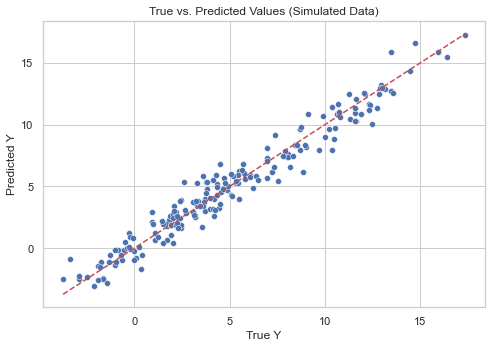

In [4]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_pred)
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted Values (Simulated Data)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.tight_layout()
plt.show()

MSE (Linear): 14.15759230588184
R^2 (Linear): 0.3339310974492016


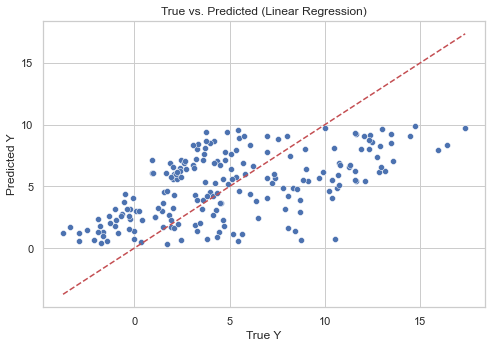

In [5]:
# Fit linear regression (no polynomial features)
model_linear = LinearRegression()
model_linear.fit(X, y)

# Predict
y_pred_linear = model_linear.predict(X)

# Evaluate
print("MSE (Linear):", mean_squared_error(y, y_pred_linear))
print("R^2 (Linear):", r2_score(y, y_pred_linear))

plt.figure(figsize=(7, 5))
sns.scatterplot(x=y, y=y_pred_linear)
plt.xlabel("True Y")
plt.ylabel("Predicted Y")
plt.title("True vs. Predicted (Linear Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 45-degree line
plt.tight_layout()
plt.show()


## 🏠 Real Data Example (California Housing)

In [6]:
from sklearn.datasets import fetch_california_housing

# Load data
data = fetch_california_housing()
X_real = pd.DataFrame(data.data, columns=data.feature_names)
y_real = data.target
X_small = X_real[['MedInc', 'AveRooms', 'HouseAge']]

In [8]:
# Fit polynomial regression on real data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_small, y_real, random_state=42)
model_real = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    LinearRegression()
)
model_real.fit(X_train, y_train)
y_pred_real = model_real.predict(X_test)

print('MSE:', mean_squared_error(y_test, y_pred_real))
print('R^2:', r2_score(y_test, y_pred_real))

MSE: 0.6251214550915924
R^2: 0.5275748927780592


In [9]:
# Coefficient table
coefs_real = model_real.named_steps['linearregression'].coef_
features_real = model_real.named_steps['polynomialfeatures'].get_feature_names_out(X_small.columns)
coef_df_real = pd.DataFrame({'Feature': features_real, 'Coefficient': coefs_real})
coef_df_real.sort_values(by='Coefficient', key=abs, ascending=False).head(10)

,Feature,Coefficient
0,MedInc,0.978038
3,MedInc^2,-0.428787
7,AveRooms HouseAge,-0.342566
6,AveRooms^2,0.276905
5,MedInc HouseAge,0.275332
4,MedInc AveRooms,0.194645
8,HouseAge^2,0.169682
1,AveRooms,-0.158663
2,HouseAge,0.127621


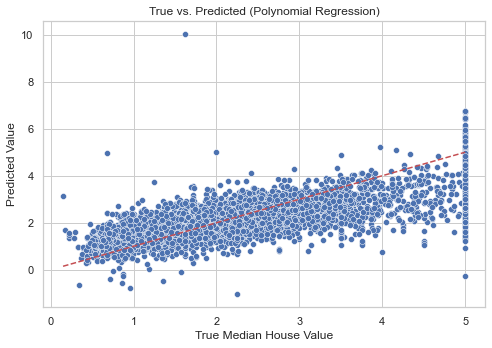

In [10]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_real)
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Value")
plt.title("True vs. Predicted (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.tight_layout()
plt.show()


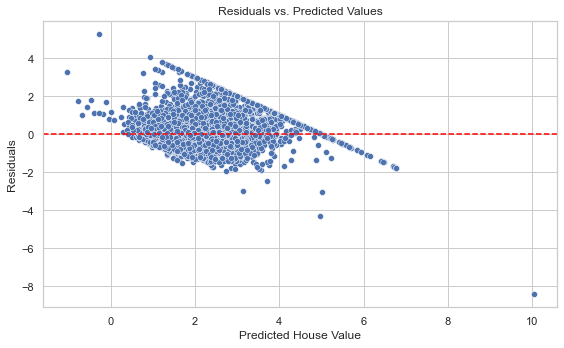

In [14]:
residuals = y_test - y_pred_real
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_real, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted House Value")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.tight_layout()
plt.show()